In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle


In [2]:
# Load the dataset
file_path = 'output/csv/master_dataset_oecd_countries.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display the column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

     Country    Year  Life Expectancy  Population          Type  \
0  Australia  1950.0             69.0        8177  Country/Area   
1  Australia  1951.0             68.7        8420  Country/Area   
2  Australia  1952.0             69.1        8633  Country/Area   
3  Australia  1953.0             69.7        8819  Country/Area   
4  Australia  1954.0             69.9        9003  Country/Area   

   Male Population, as of 1 July (thousands)  \
0                                     4120.0   
1                                     4253.0   
2                                     4367.0   
3                                     4463.0   
4                                     4555.0   

   Female Population, as of 1 July (thousands)  \
0                                       4057.0   
1                                       4167.0   
2                                       4266.0   
3                                       4356.0   
4                                       4448.0   

   Male

In [3]:
#Identify the Top 15 Wealthiest Countries Based on GDP

In [4]:
# Filter for the latest year data (optional, if you want to focus on a specific year)
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]

# Sort countries by GDP per capita and select the top 15 wealthiest countries
top_wealthiest_countries = df_latest.sort_values(by='GDP per Capita', ascending=False).head(15)['Country'].tolist()

# Filter the main dataset to include only these top wealthiest countries
df_wealthiest = df[df['Country'].isin(top_wealthiest_countries)]

# Print the list of top 15 wealthiest countries based on GDP per capita
print("Top 15 Wealthiest Countries Based on GDP per Capita:")
print(top_wealthiest_countries)


Top 15 Wealthiest Countries Based on GDP per Capita:
['Norway', 'Switzerland', 'United States', 'Ireland', 'Luxembourg', 'Australia', 'Denmark', 'Netherlands', 'Sweden', 'Germany', 'Canada', 'Austria', 'Belgium', 'Iceland', 'Republic of Korea']


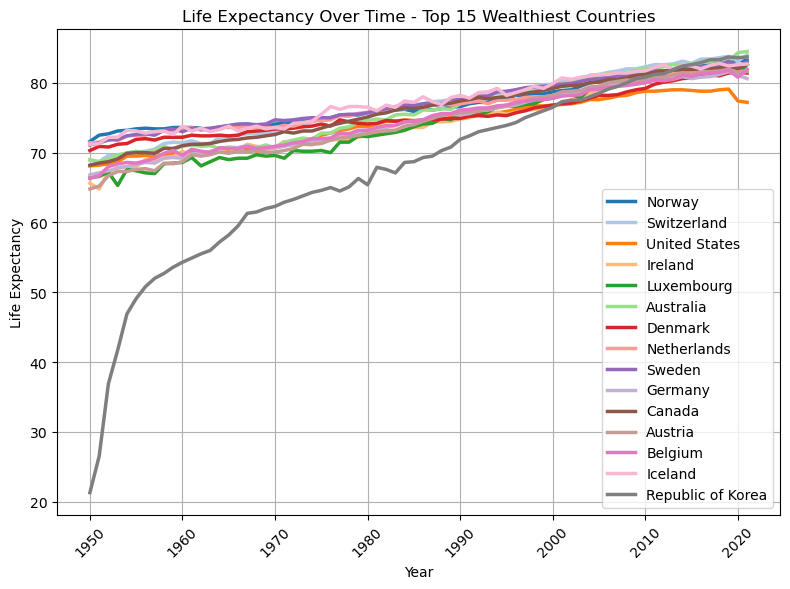

In [5]:
plt.figure(figsize=(8, 6))
# Get a cycle of colors to use for each country
color_cycle = cycle(plt.cm.tab20.colors)  # You can change the colormap as per your preference

# Iterate through each country and plot a line graph of life expectancy over years
for country in top_wealthiest_countries:
    country_data = df_wealthiest[df_wealthiest['Country'] == country]
    color = next(color_cycle)
    plt.plot(country_data['Year'], country_data['Life Expectancy'], label=country,color=color, linewidth=2.5)

plt.title('Life Expectancy Over Time - Top 15 Wealthiest Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Analyzing Life Expectancy vs. GDP per Capita Relationship

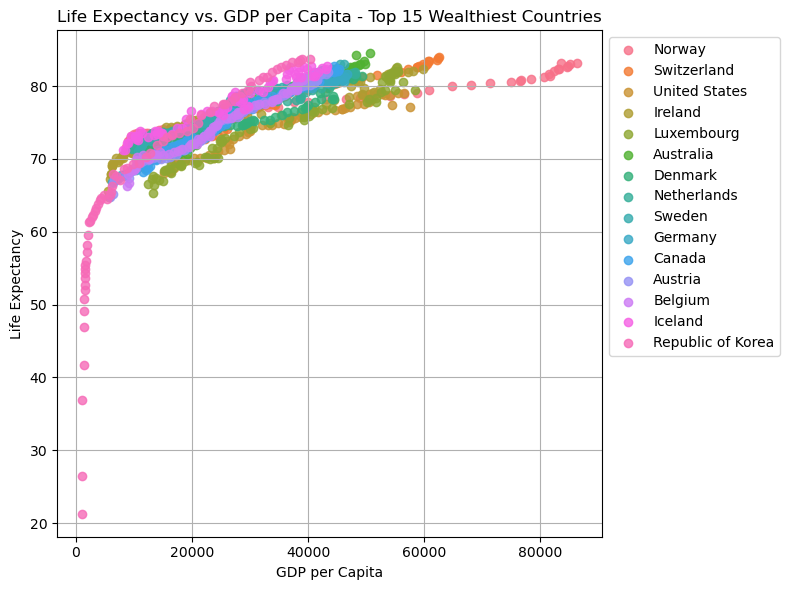

In [7]:
# Scatter plot of Life Expectancy vs. GDP per Capita
plt.figure(figsize=(8, 6))

# Define a color map with a unique color for each country
colors = sns.color_palette('husl', n_colors=len(top_wealthiest_countries))

# Scatter plot with each country's data points colored differently
for i, country in enumerate(top_wealthiest_countries):
    country_data = df_wealthiest[df_wealthiest['Country'] == country]
    plt.scatter(country_data['GDP per Capita'], country_data['Life Expectancy'], 
                color=colors[i], alpha=0.8, label=country)

plt.title('Life Expectancy vs. GDP per Capita - Top 15 Wealthiest Countries')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Time Series of Life Expectancy


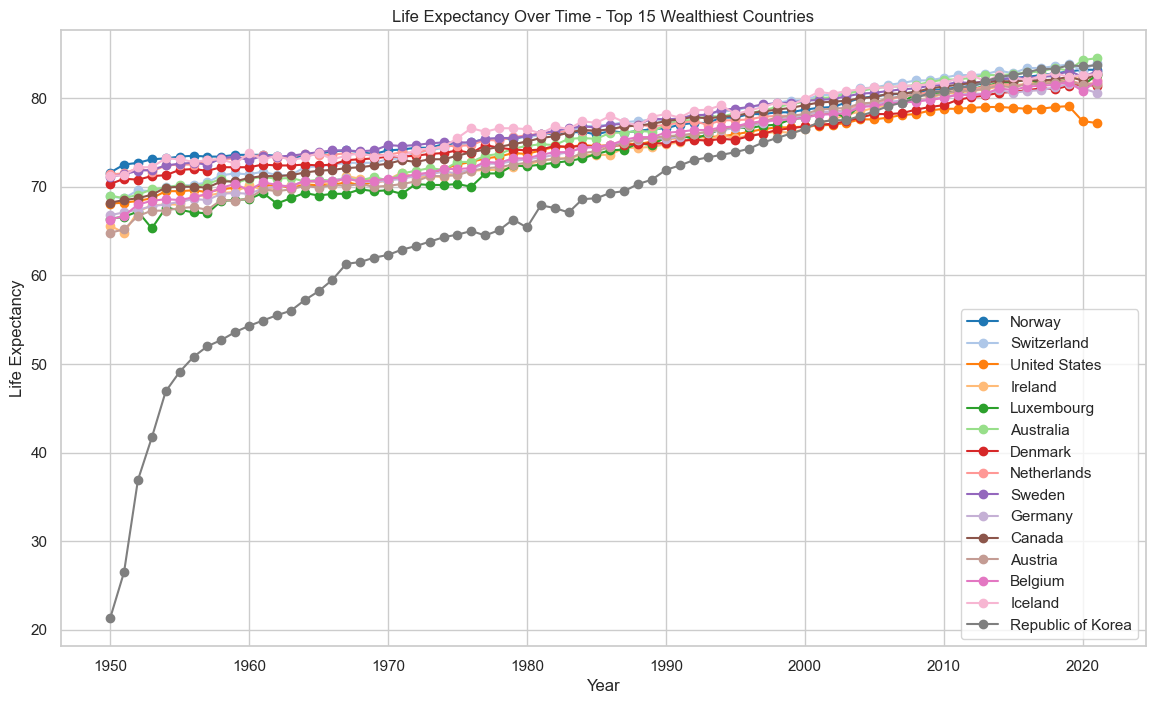

In [9]:
# Ensure seaborn plots are visually appealing
sns.set(style="whitegrid")

# Get a cycle of colors to use for each country
color_cycle = cycle(plt.cm.tab20.colors)  # You can change the colormap as per your preference

# Plotting time series of life expectancy for the top wealthiest countries
plt.figure(figsize=(14, 8))

for country in top_wealthiest_countries:
    country_data = df_wealthiest[df_wealthiest['Country'] == country]
    color = next(color_cycle)
    plt.plot(country_data['Year'], country_data['Life Expectancy'], marker='o', label=country, color=color)

plt.title('Life Expectancy Over Time - Top 15 Wealthiest Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Comparison of GDP per Capita Across Wealthiest Countries


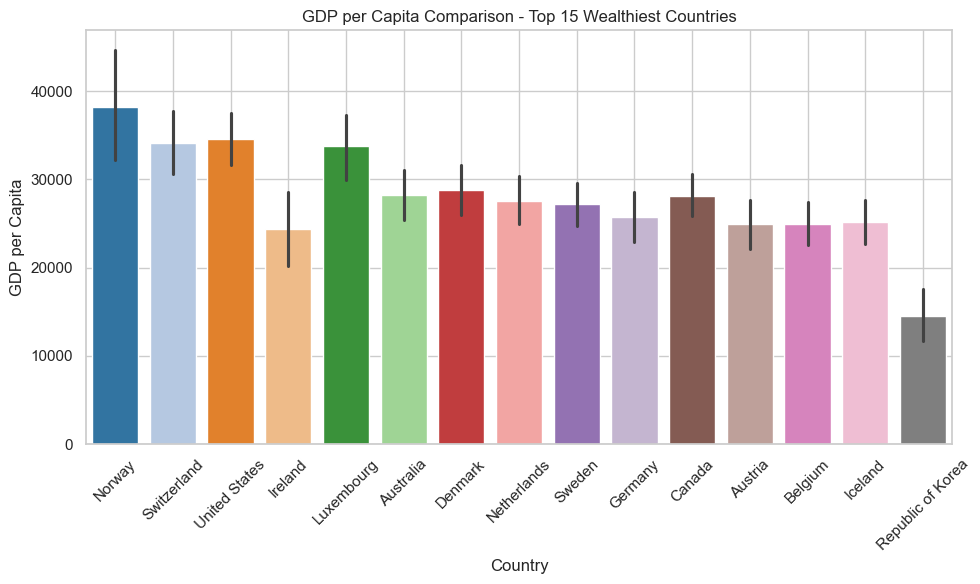

In [11]:
# Bar chart of GDP per Capita across the top wealthiest countries

# Ensure seaborn plots are visually appealing
sns.set(style="whitegrid")

# Get a cycle of colors to use for each country
color_cycle = cycle(plt.cm.tab20.colors)  # You can change the colormap as per your preference

# Create a dictionary to map each country to a color
color_dict = {country: next(color_cycle) for country in top_wealthiest_countries}

# Create a color list matching the order of countries in top_wealthiest_countries
color_list = [color_dict[country] for country in top_wealthiest_countries]

# Bar chart of GDP per Capita across the top wealthiest countries
plt.figure(figsize=(10, 6))

# Plotting with hue set to Country and using the custom color palette
sns.barplot(x='Country', y='GDP per Capita', data=df_wealthiest, hue='Country',
            palette=color_dict, order=top_wealthiest_countries, dodge=False, legend=False)

plt.title('GDP per Capita Comparison - Top 15 Wealthiest Countries')
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [12]:
#Time Series of GDP per Capita


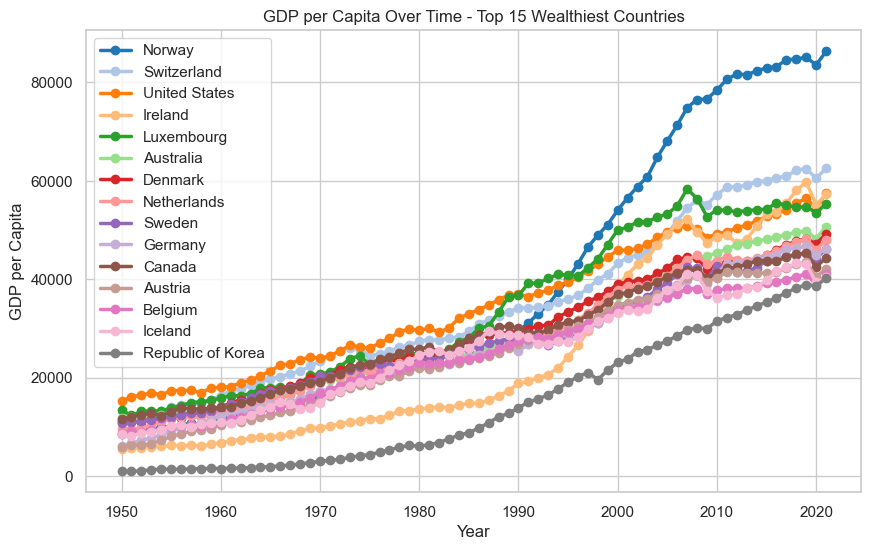

In [13]:
# Plotting time series of GDP per capita for the top wealthiest countries
plt.figure(figsize=(10, 6))

# Get a cycle of colors to use for each country
color_cycle = cycle(plt.cm.tab20.colors)  # You can change the colormap as per your preference

for country in top_wealthiest_countries:
    country_data = df_wealthiest[df_wealthiest['Country'] == country]
    color = next(color_cycle)
    plt.plot(country_data['Year'], country_data['GDP per Capita'], marker='o', label=country, color=color, linewidth=2.5)

plt.title('GDP per Capita Over Time - Top 15 Wealthiest Countries')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.legend()
plt.grid(True)
plt.show()
